# PSO Evaluation

Since this is just used to evaluate a PSO algorithm, no test set is created.

In [1]:
import pandas as pd
# from collections import Counter
# from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json

%matplotlib inline

In [2]:
plt.rcParams.update({'figure.figsize': (15, 10),
                     'font.size': 14,
                     'axes.grid': True ,'image.cmap': 'magma'
                    })

#### Get the Iris data set

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

y_labels = np.unique(y)

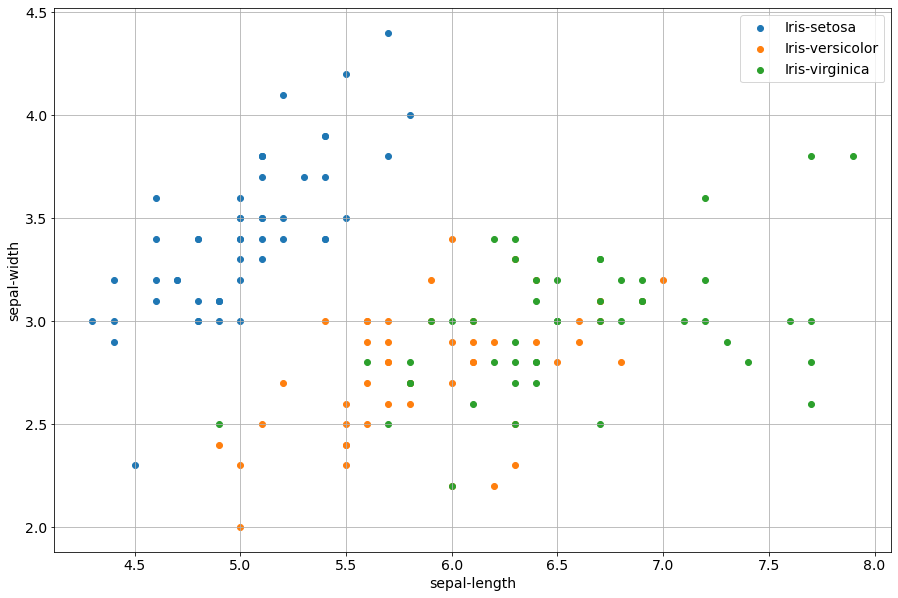

In [4]:
for l in y_labels:
    x_curr = dataset.loc[dataset['class'] == l]
    plt.scatter(x_curr.iloc[:, 0], x_curr.iloc[:, 1], label=l)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()
plt.show()

#### Used Features

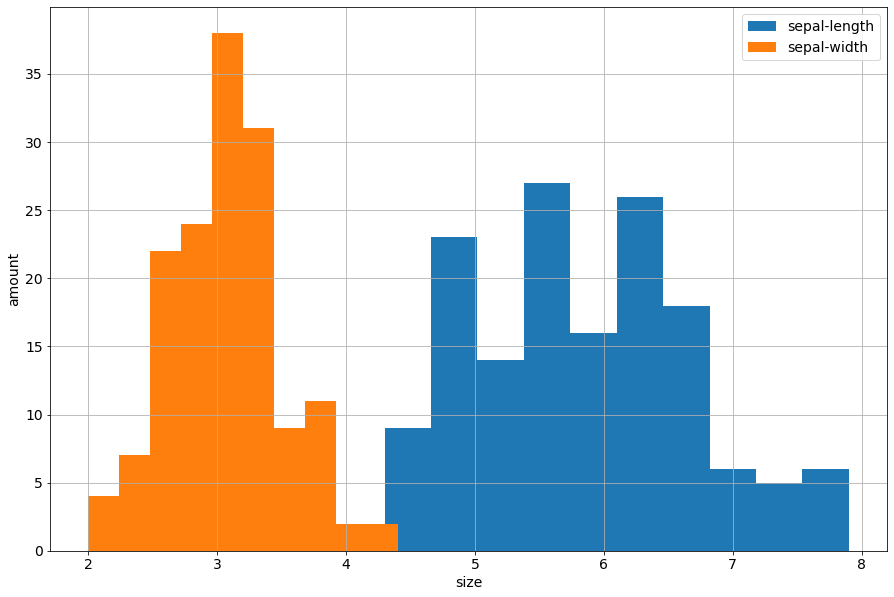

In [5]:
plt.hist(x.iloc[:,0], label='sepal-length')
plt.hist(x.iloc[:,1], label='sepal-width')
plt.xlabel('size')
plt.ylabel('amount')
plt.legend()
plt.show()

In [6]:
selected_df = dataset[(dataset['class'] == 'Iris-setosa') | (dataset['class'] == 'Iris-virginica')]

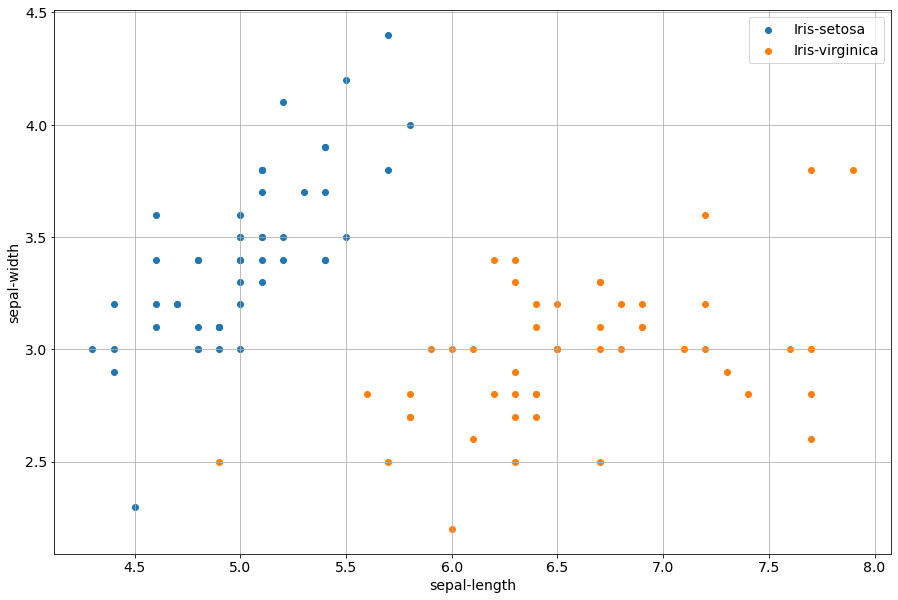

In [7]:
for c in ['Iris-setosa', 'Iris-virginica']:
    curr_c = selected_df[selected_df['class'] == c]
    plt.scatter(curr_c['sepal-length'], curr_c['sepal-width'], label=c)
    plt.xlabel('sepal-length')
    plt.ylabel('sepal-width')
plt.legend()
plt.show()

### Create a linear separable data set 
To test the PSO algorithm whether the algorithm finds a hyperplane to separate the two types or not, the created data set only contains 2 classes which are linear separable (this is not the case in real life data sets, here it is just to evaluate the algorithm). No train and test split here since the data set is just used to evaluated the algorithm.

The data set is created with the script `create_tmp_dataset.py`.

### Result of the PSO
Configuration: 10 Particles, 50 iterations.

In [8]:
# labels used in the training phase of the PSO
label_dict = {0: 'Iris-setosa', 1: 'Iris-virginica'}

In [9]:
dataset = pd.read_csv('data_2_class_Iris-setosa_Iris-virginica.csv')

In [10]:
dataset.head()

,sepal-length,sepal-width,class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [11]:
with open('result.json', 'rb') as fd:
    res = json.load(fd)

In [12]:
best_per_iter = [x['currentBestFitness'] for x in res]
mean_fit_per_iter = [x['meanFitnessSwarm'] for x in res]
init_best_particle = list(map(lambda x: float(x), res[0]['currentBest'].split(' ')))
first_best_particle = res[0]['currentBest'].split(' ')
final_best_particle = res[-1]['currentBest'].split(' ')

In [13]:
print('Best particle has vector: {}'.format(first_best_particle))
print('Best particle has vector: {}'.format(final_best_particle))

Best particle has vector: ['6.965918472827141', '-3.766409218142668', '9.199099501792077']
Best particle has vector: ['8.607698886238516', '-7.482803896283369', '10.925450230243994']


The first value is the bias $w_0$.

$y = mx + b$ written as:

$w^T x + w_0 = 0$

#### Best Result:
$w_0 = 8.607698886238516$

$w_1 = -7.482803896283369$

$w_2 = 10.925450230243994$

$\begin{bmatrix}
           w_{1} \\
           w_{2} \\
         \end{bmatrix}^T
\cdot   \begin{align}
    \begin{bmatrix}
           x_{1} \\
           x_{2} \\
         \end{bmatrix}
\end{align} + w_{0} = 0$




$\begin{bmatrix}
           w_{1} ~ w_{2} \\
         \end{bmatrix}
\cdot   \begin{align}
    \begin{bmatrix}
           x_{1} \\
           x_{2} \\
         \end{bmatrix}
\end{align} + w_{0} = 0$

$w_1 x_1 + w_2 x_2 + w_0 = 0$

$x_2 = \frac{-w_1 x_1 + w_0}{w_2}$

$x_2 = \frac{-(-7.482803896283369) x_1 + 8.607698886238516}{10.925450230243994}$

$y = \frac{7.482803896283369 x + 8.607698886238516}{10.925450230243994}$

In [14]:
label_dict = {0: 'Iris-setosa', 1: 'Iris-virginica'}

#### Best vector of iteration 1 vs best vector of iteration 50

In [15]:
def y(w0, w1, w2, x):
    return (-w1 * x - w0) / w2

In [16]:
first_best_y = lambda x: y(float(first_best_particle[0]), float(first_best_particle[1]), float(first_best_particle[2]), x)
final_best_y = lambda x: y(float(final_best_particle[0]), float(final_best_particle[1]), float(final_best_particle[2]), x)

In [17]:
x_values = np.arange(2.0, 10.0, 0.01)
first_y = first_best_y(x_values)
best_y = final_best_y(x_values)

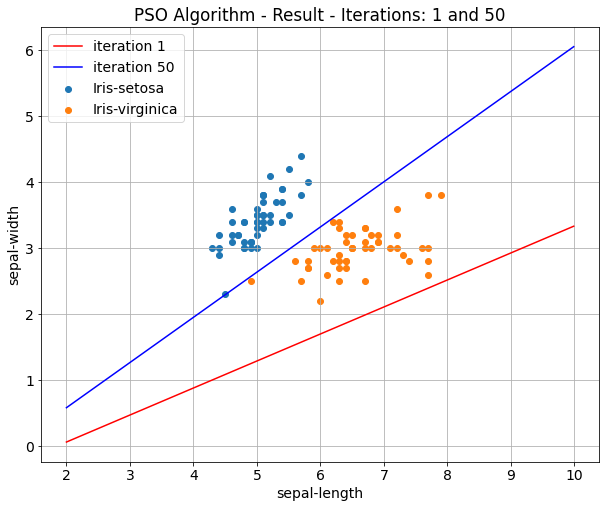

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(x_values, first_y, c='red', label='iteration 1')
plt.plot(x_values, best_y, c='blue', label='iteration 50')
for l in [0, 1]:
    x_curr = dataset.loc[dataset['class'] == l]
    plt.scatter(x_curr.iloc[:, 0], x_curr.iloc[:, 1], label=label_dict[l])
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()
plt.title('PSO Algorithm - Result - Iterations: 1 and 50')
# plt.savefig('result_plot.png', bbox_inches='tight')
plt.show()

#### Fitness Value of best performing particle over iterations

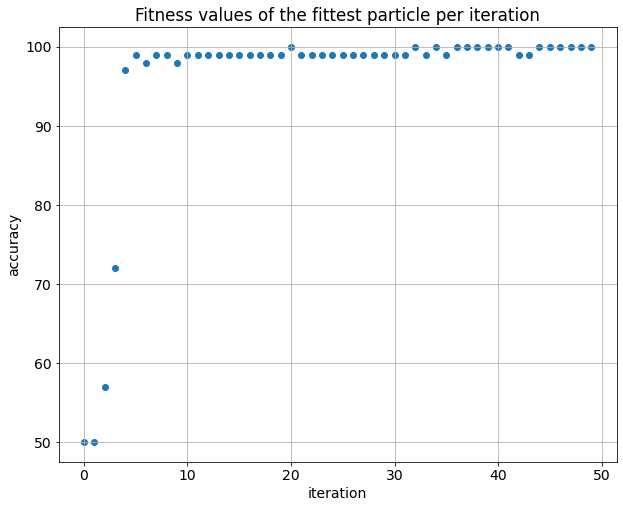

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(range(0, len(best_per_iter)), best_per_iter)
plt.title('Fitness values of the fittest particle per iteration')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.show()

#### Mean fitness of the swarm

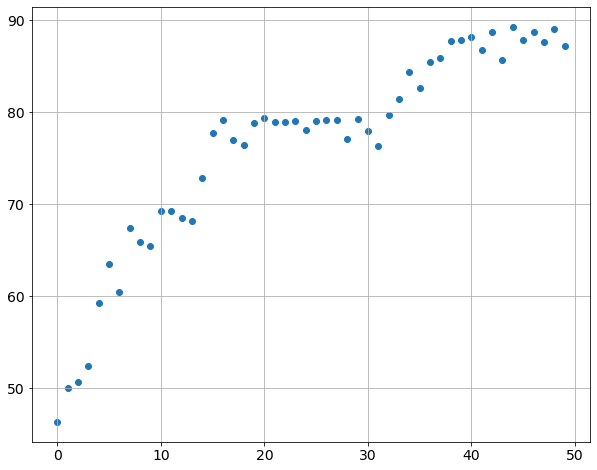

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(range(0, len(mean_fit_per_iter)), mean_fit_per_iter)
plt.show()

$x_2 = \frac{-w_1 x_1 + w_0}{w_2}$

In [21]:
final_best_particle

['8.607698886238516', '-7.482803896283369', '10.925450230243994']

$w_1 x_1 + w_2 x_2 + w_0 = 0$

In [22]:
decision = lambda x, y: float(final_best_particle[1]) * x + float(final_best_particle[2]) * y + float(final_best_particle[0])

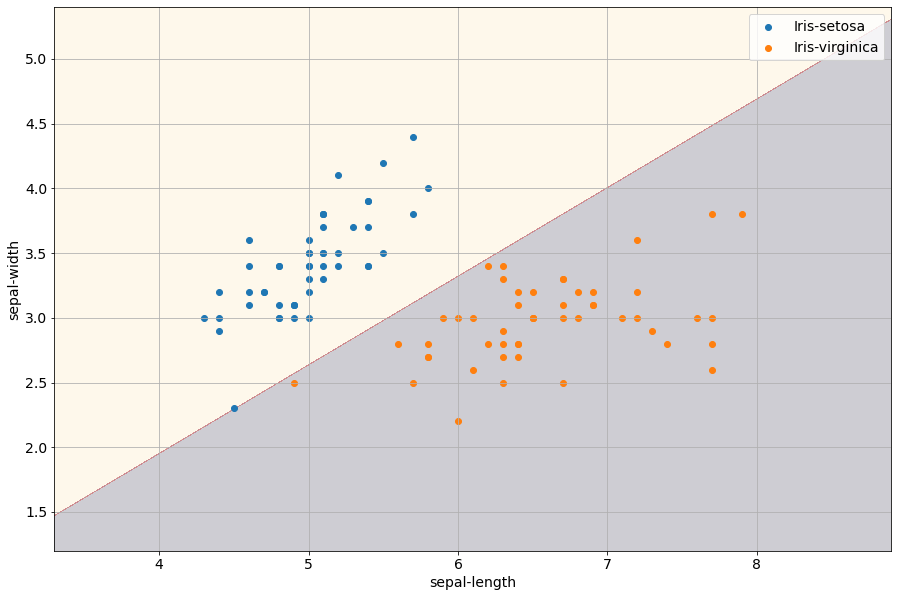

In [23]:
u = np.linspace(dataset['sepal-length'].values.min() - 1, dataset['sepal-length'].values.max() + 1, 5000)
v = np.linspace(dataset['sepal-width'].values.min() - 1, dataset['sepal-width'].values.max() + 1, 5000)
X, Y = np.meshgrid(u, v)
Z = decision(X, Y)

Z[Z > 0] = 1
Z[Z <= 0] = 0

# plt.pcolor(Z) 
plt.contourf(X, Y, Z, alpha=0.2)
for l in [0, 1]:
    x_curr = dataset.loc[dataset['class'] == l]
    plt.scatter(x_curr.iloc[:, 0], x_curr.iloc[:, 1], label=label_dict[l])
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()
plt.show()